In [1]:
import sys
import os
import pandas as pd
from pprint import pprint

# Import your custom modules. Adjust the module paths as needed.
from data.load_data import loadTrainingData
from plots.feature_plots import plot_missingness

In [2]:
# Define directories and max_files manually.
directories = ['../../training_setA/', '../../training_setB/']
max_files = 1000  # Change this to a number (e.g., 1000) if you want to limit the number of files
ignore_columns = ['Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime']

dfs = []
patient_dict = {}

for directory in directories:
    # Build the path pattern for .psv files in the directory.
    pattern = os.path.join(directory, "*.psv")
    print(f"\nLoading data from: {pattern} with max_files={max_files}")
    patient_data = loadTrainingData(pattern, max_files)
    
    patient_dict.update(patient_data)



Loading data from: ../../training_setA/*.psv with max_files=1000


Loading PSV Files: 100%|███████████████████| 1000/1000 [00:01<00:00, 964.41it/s]



Loading data from: ../../training_setB/*.psv with max_files=1000


Loading PSV Files: 100%|███████████████████| 1000/1000 [00:01<00:00, 996.79it/s]


In [3]:
from data.clean_data import forwardFillMAP, forwardFillDBP, forwardFillSBP, forwardFillHasselbalch
from tqdm import tqdm

for patient_id, df in tqdm(patient_dict.items(), desc="Filling Confirmed Values:"):
    temp_df = forwardFillMAP(df)
    temp_df = forwardFillDBP(temp_df)
    temp_df = forwardFillSBP(temp_df)
    temp_df = forwardFillHasselbalch(temp_df)

    patient_dict[patient_id] = temp_df


Filling Confirmed Values:: 100%|███████████| 2000/2000 [00:04<00:00, 462.12it/s]


In [4]:
from models.mice.encode_data import encode_dict_deltas

encoded_patient_dict = encode_dict_deltas(patient_dict)

del patient_dict

Encoding patients: 100%|████████████████████| 2000/2000 [00:28<00:00, 69.31it/s]


In [5]:
from models.mice.encode_data import merge_patient_dict

encoded_df = merge_patient_dict(encoded_patient_dict, 'SepsisLabel_delta')

del encoded_patient_dict

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

encoded_df.head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel,patient_id,SepsisLabel_delta,HR_delta1,HR_delta2,O2Sat_delta1,O2Sat_delta2,Temp_delta1,Temp_delta2,SBP_delta1,SBP_delta2,MAP_delta1,MAP_delta2,DBP_delta1,DBP_delta2,Resp_delta1,Resp_delta2,EtCO2_delta1,EtCO2_delta2,BaseExcess_delta1,BaseExcess_delta2,HCO3_delta1,HCO3_delta2,FiO2_delta1,FiO2_delta2,pH_delta1,pH_delta2,PaCO2_delta1,PaCO2_delta2,SaO2_delta1,SaO2_delta2,AST_delta1,AST_delta2,BUN_delta1,BUN_delta2,Alkalinephos_delta1,Alkalinephos_delta2,Calcium_delta1,Calcium_delta2,Chloride_delta1,Chloride_delta2,Creatinine_delta1,Creatinine_delta2,Bilirubin_direct_delta1,Bilirubin_direct_delta2,Glucose_delta1,Glucose_delta2,Lactate_delta1,Lactate_delta2,Magnesium_delta1,Magnesium_delta2,Phosphate_delta1,Phosphate_delta2,Potassium_delta1,Potassium_delta2,Bilirubin_total_delta1,Bilirubin_total_delta2,TroponinI_delta1,TroponinI_delta2,Hct_delta1,Hct_delta2,Hgb_delta1,Hgb_delta2,PTT_delta1,PTT_delta2,WBC_delta1,WBC_delta2,Fibrinogen_delta1,Fibrinogen_delta2,Platelets_delta1,Platelets_delta2
0,80.0,100.0,36.5,121.0,58.0,41.0,13.5,NaN,1.0,25.000000,1.0,7.40,47.0,77.0,NaN,53.0,NaN,NaN,111.0,2.10,NaN,107.0,2.40,NaN,NaN,3.7,NaN,NaN,27.9,8.8,38.1,9.9,223.0,160.0,0,014977,-250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,88.0,98.0,38.0,166.0,88.0,58.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,110734,-250,-8.0,-2.0,-1.0,0.0,0.0,-0.2,-16.0,60.0,-2.0,10.0,2.0,-4.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,92.0,99.0,38.0,160.0,88.0,54.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,110734,-250,4.0,-4.0,1.0,0.0,0.0,0.0,-6.0,-22.0,0.0,-2.0,-4.0,-2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86.0,100.0,38.0,158.0,86.0,56.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,110734,-250,-6.0,-2.0,1.0,2.0,0.0,0.0,-2.0,-8.0,-2.0,-2.0,2.0,-2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,107248,-250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,95.0,98.0,NaN,126.0,93.0,66.0,15.0,NaN,NaN,29.552193,0.6,7.46,43.0,97.9,59.0,35.0,58.0,1.16,NaN,1.68,NaN,143.0,1.39,2.2,6.5,3.6,0.9,43.88,39.1,13.1,44.7,13.9,NaN,264.0,0,107248,-250,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
6,90.0,98.0,36.9,111.0,85.0,63.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [7]:
encoded_df.tail(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,SepsisLabel,patient_id,SepsisLabel_delta,HR_delta1,HR_delta2,O2Sat_delta1,O2Sat_delta2,Temp_delta1,Temp_delta2,SBP_delta1,SBP_delta2,MAP_delta1,MAP_delta2,DBP_delta1,DBP_delta2,Resp_delta1,Resp_delta2,EtCO2_delta1,EtCO2_delta2,BaseExcess_delta1,BaseExcess_delta2,HCO3_delta1,HCO3_delta2,FiO2_delta1,FiO2_delta2,pH_delta1,pH_delta2,PaCO2_delta1,PaCO2_delta2,SaO2_delta1,SaO2_delta2,AST_delta1,AST_delta2,BUN_delta1,BUN_delta2,Alkalinephos_delta1,Alkalinephos_delta2,Calcium_delta1,Calcium_delta2,Chloride_delta1,Chloride_delta2,Creatinine_delta1,Creatinine_delta2,Bilirubin_direct_delta1,Bilirubin_direct_delta2,Glucose_delta1,Glucose_delta2,Lactate_delta1,Lactate_delta2,Magnesium_delta1,Magnesium_delta2,Phosphate_delta1,Phosphate_delta2,Potassium_delta1,Potassium_delta2,Bilirubin_total_delta1,Bilirubin_total_delta2,TroponinI_delta1,TroponinI_delta2,Hct_delta1,Hct_delta2,Hgb_delta1,Hgb_delta2,PTT_delta1,PTT_delta2,WBC_delta1,WBC_delta2,Fibrinogen_delta1,Fibrinogen_delta2,Platelets_delta1,Platelets_delta2
77405,99.0,95.0,NaN,130.0,72.0,51.0,20.0,NaN,NaN,27.269173,0.6,7.57,30.8,95.3,NaN,NaN,NaN,1.3,NaN,NaN,NaN,150.0,2.34,NaN,NaN,4.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,111007,9,-1.5,-1.0,-2.0,-2.0,NaN,NaN,-38.0,-19.0,-27.0,-16.0,-18.0,-12.0,-2.5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77406,NaN,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,014142,9,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77407,95.0,98.0,36.5,146.0,96.0,78.0,30.0,NaN,0.0,21.002512,0.7,7.44,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,018630,9,-3.0,-1.0,0.0,-1.0,NaN,NaN,-4.0,-6.0,-9.0,-8.0,-8.0,-6.0,-4.0,-4.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77408,134.0,94.0,38.3,172.0,123.0,85.0,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,NaN,NaN,NaN,3.80,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,1,117891,9,-1.0,13.0,-1.0,-1.0,NaN,-0.2,-45.0,13.0,-29.0,17.0,-32.0,9.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77409,87.0,97.0,NaN,122.0,72.0,51.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,005259,9,1.0,3.0,1.0,2.0,NaN,NaN,-5.0,-19.0,1.0,-11.0,2.0,-9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77410,93.0,95.0,NaN,109.0,85.0,72.0,21.5,NaN,NaN,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,009661,9,-1.0,1.0,-1.0,-3.0,NaN,NaN,9.0,5.0,6.0,3.0,6.0,2.0,0.5,2.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77411,102.0,100.0,NaN,147.0,77.0,58.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [8]:
from models.mice.encode_data import impute_delta_features

imputed_df = impute_delta_features(encoded_df)

del encoded_df

[IterativeImputer] Completing matrix with shape (77415, 68)
[IterativeImputer] Ending imputation round 1/10, elapsed time 6.45
[IterativeImputer] Change: 1.1622658490715404e+19, scaled tolerance: 0.725 
[IterativeImputer] Ending imputation round 2/10, elapsed time 15.25
[IterativeImputer] Change: 4.935268708537718e+32, scaled tolerance: 0.725 
[IterativeImputer] Ending imputation round 3/10, elapsed time 21.28
[IterativeImputer] Change: 2.4095337541922706e+44, scaled tolerance: 0.725 
[IterativeImputer] Ending imputation round 4/10, elapsed time 26.44
[IterativeImputer] Change: 2.015680640960648e+57, scaled tolerance: 0.725 
[IterativeImputer] Ending imputation round 5/10, elapsed time 32.36
[IterativeImputer] Change: 4.150419397327676e+70, scaled tolerance: 0.725 
[IterativeImputer] Ending imputation round 6/10, elapsed time 39.14
[IterativeImputer] Change: 5.334786475712103e+82, scaled tolerance: 0.725 
[IterativeImputer] Ending imputation round 7/10, elapsed time 45.45
[IterativeImp

/Users/lukeedwards/anaconda3/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [9]:
from models.mice.encode_data import split_and_restructure

imputed_dict = split_and_restructure(imputed_df)

del imputed_df

Rebuild Dictionary: 100%|█████████████████| 2000/2000 [00:00<00:00, 2420.94it/s]


In [10]:
from models.mice.encode_data import reconstruct_vitals
from tqdm import tqdm

reconstructed_impute_dict = {}

for patient_id, df in tqdm(imputed_dict.items(), desc='reconstructing'):
    reconstructed_df = reconstruct_vitals(df.copy(), max_iter=50)
    reconstructed_impute_dict[patient_id] = reconstructed_df
    
del imputed_dict

reconstructing: 100%|███████████████████████| 2000/2000 [00:38<00:00, 51.72it/s]


Starting


Creating Windows: 100%|████████████████████| 2000/2000 [00:17<00:00, 114.59it/s]


[LightGBM] [Info] Number of positive: 1010, number of negative: 52922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34612
[LightGBM] [Info] Number of data points in the train set: 53932, number of used features: 136
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018727 -> initscore=-3.958869
[LightGBM] [Info] Start training from score -3.958869
Accuracy: 0.9925

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13246
           1       0.96      0.60      0.74       237

    accuracy                           0.99     13483
   macro avg       0.98      0.80      0.87     13483
weighted avg       0.99      0.99      0.99     13483

Subset ROC AUC (predicted=1 or actual=1): 0.485


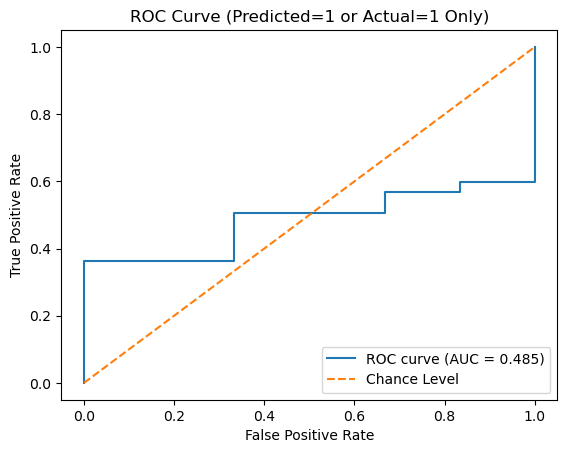

Accuracy: 0.9925090855150931

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     13246
           1       0.96      0.60      0.74       237

    accuracy                           0.99     13483
   macro avg       0.98      0.80      0.87     13483
weighted avg       0.99      0.99      0.99     13483



In [11]:
from models.lgbm_impl import train_and_evaluate_lgbm
print("Starting")
result = train_and_evaluate_lgbm(reconstructed_impute_dict, window=6)

# Access the results
print("Accuracy:", result["accuracy"])
print("\nClassification Report:\n", result["classification_report"])